# **PLANET HUNTERS**

**By Kavya Ram**

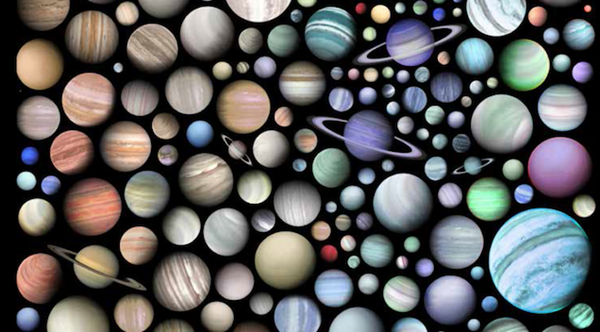

In [ ]:
#@title I'll run this code to get started
!wget -q --show-progress 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20Planet%20Hunters/exoTrain.csv'
!wget -q --show-progress 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20Planet%20Hunters/exoTest.csv'

from urllib.request import urlretrieve
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn import  metrics
from sklearn import tree
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from scipy.signal import savgol_filter
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay,precision_score,recall_score,f1_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, normalize

import warnings
warnings.filterwarnings('ignore')

def analyze_results(model, X_train, y_train, X_test, y_test):
    """
    Helper function to help interpret and model performance.

    Args:
    model: estimator instance
    X_train: {array-like, sparse matrix} of shape (n_samples, n_features)
    Input values for model training.
    y_train : array-like of shape (n_samples,)
    Target values for model training.
    X_test: {array-like, sparse matrix} of shape (n_samples, n_features)
    Input values for model testing.
    y_test : array-like of shape (n_samples,)
    Target values for model testing.

    Returns:
    None
    """
    print("-------------------------------------------")
    print("Model Results")
    print("")
    print("Training:")
    ConfusionMatrixDisplay.from_estimator(model, X_train, y_train)
    plt.show()
    print("Testing:")
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)


df_train = pd.read_csv('exoTrain.csv')
df_train['LABEL'] = df_train['LABEL'] - 1
df_test = pd.read_csv('exoTest.csv')
df_test['LABEL'] = df_test['LABEL'] - 1

exoTrain.csv        100%[===================>] 250.08M  84.8MB/s    in 3.0s    
exoTest.csv         100%[===================>]  27.57M  55.6MB/s    in 0.5s    


I've downloaded a NASA dataset from the Kepler Space Telescope. Each row represents measurements of the flux (light intensity) of a particular star.

### Data Visualization

Now, I'll make sure that the data I've extracted has properly loaded. **I will print the length of each dataframe (`df_train` and `df_test`) and the first five values from `df_train`.**


In [ ]:
print("df_train len:", len(df_train))
print("df_test len:", len(df_test))
print("first 5 values of df train\n")
df_train.head()

df_train len: 5087
df_test len: 570
first 5 values of df train



,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,1,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,1,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,1,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,1,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


#### Comparing Flux Curves for Exoplanets vs. Non-Exoplanets

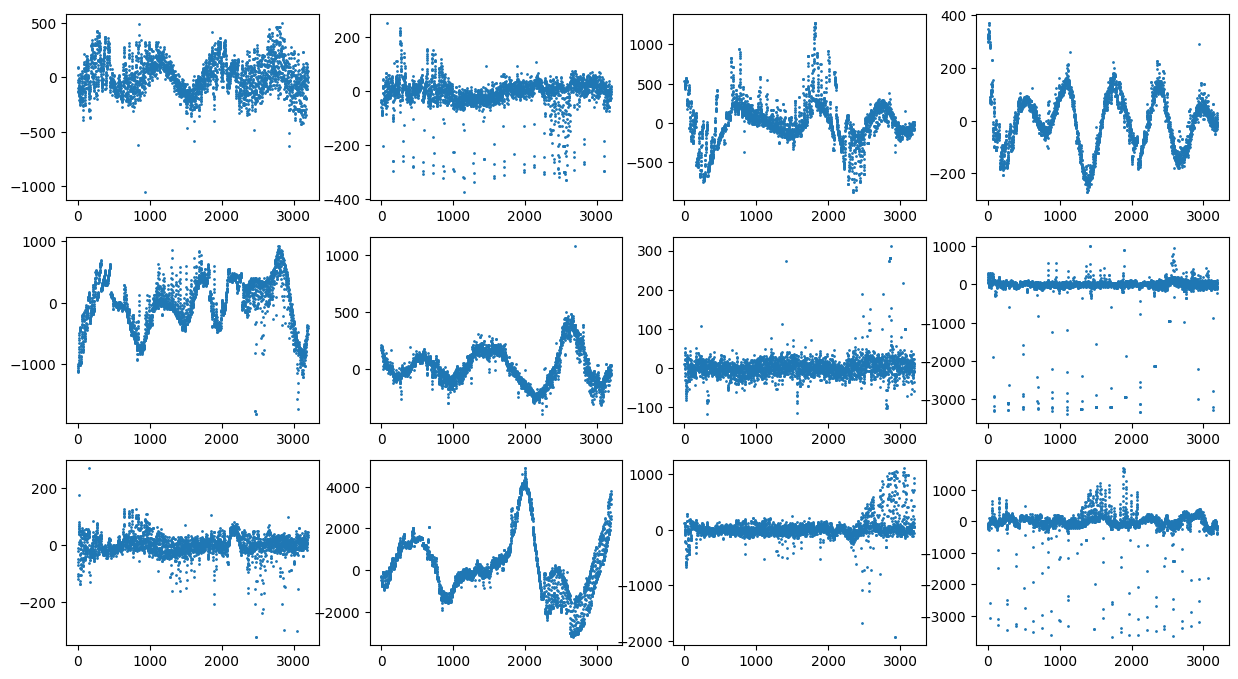

In [ ]:
#@title I will run to see samples of exoplanet stars
fig = plt.figure(figsize=(15,40))
for i in range(12):
    ax = fig.add_subplot(14,4,i+1)
    ax.scatter(np.arange(3197),df_train[df_train['LABEL'] == 1].iloc[i,1:],s=1)

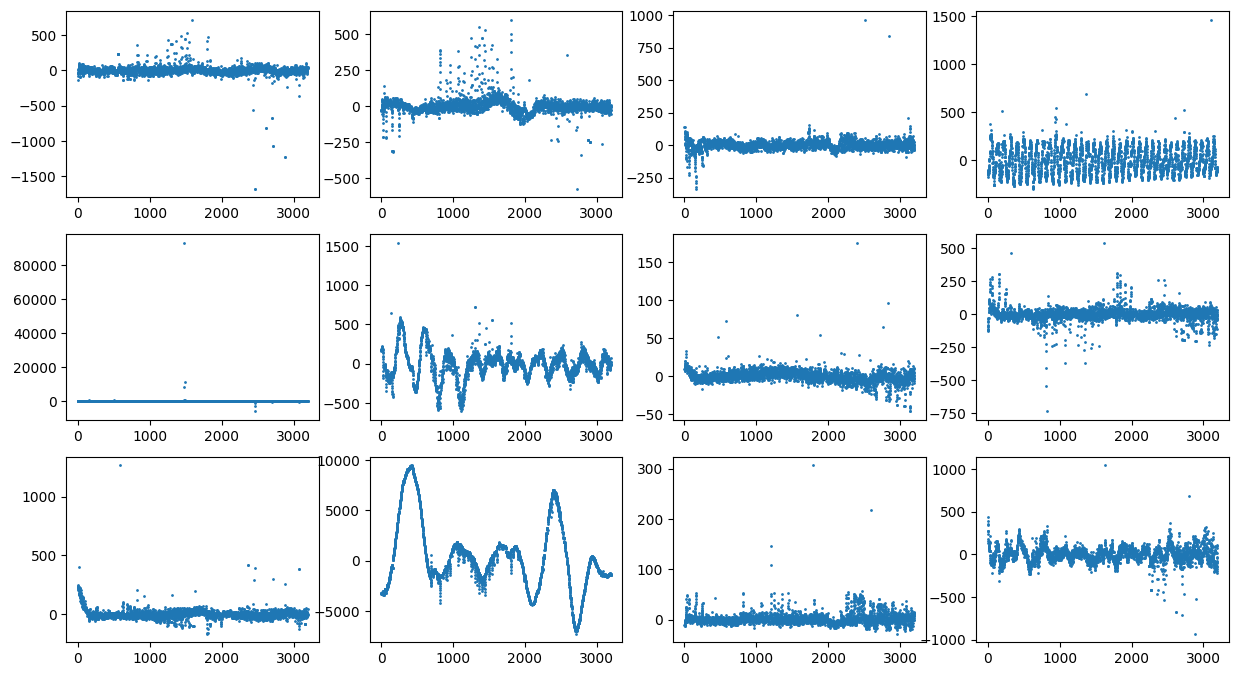

In [ ]:
#@title Now, I'll run to see samples of non-exoplanet stars
fig = plt.figure(figsize=(15,40))
for i in range(12):
    ax = fig.add_subplot(14,4,i+1)
    ax.scatter(np.arange(3197),df_train[df_train['LABEL']==0].iloc[i,1:],s=1)

### Counting Exoplanets


In [ ]:
train_with_exoplanet_samples = df_train.loc[df_train['LABEL'] == 1]
train_with_non_exoplanet_samples = df_train.loc[df_train['LABEL'] == 0]

print("exoplanet samples in train:", len(train_with_exoplanet_samples))
print("non-exoplanet samples in train:", len(train_with_non_exoplanet_samples))

test_with_exoplanet_samples = df_test.loc[df_test['LABEL'] == 1]
test_with_non_exoplanet_samples = df_test.loc[df_test['LABEL'] == 0]

print("exoplanet samples in test:", len(test_with_exoplanet_samples))
print("non-exoplanet samples in test:", len(test_with_non_exoplanet_samples))

exoplanet samples in train: 37
non-exoplanet samples in train: 5050
exoplanet samples in test: 5
non-exoplanet samples in test: 565


Now, I'll calculate the **portion** of exoplanet stars compared to the total samples, in both the training data and the testing data.

In [ ]:
print("df_train percent:", len(train_with_exoplanet_samples)/ len(df_train))
print("df_test percent:", len(test_with_exoplanet_samples)/ len(df_test))

df_train percent: 0.007273442107332416
df_test percent: 0.008771929824561403


# Classification with KNN

Now, I'll approach my problem as a classification task: based on my flux data, does each data point represent an exoplanet star or a non-exoplanet star?

Before I make my model, I'll run the code cell below to split my data into the familiar `X_train`, `y_train`, `X_test`, `y_test`

In [ ]:
X_train = df_train.drop('LABEL', axis=1)
y_train = df_train['LABEL']

X_test = df_test.drop('LABEL', axis=1)
y_test = df_test['LABEL']

#### Step 1: Create my model

I'll start by using a `KNeighborsClassifier` model, which has already been imported from [Scikit-learn].

In [ ]:
# Creating a KNN model (will train later)

###

n_neighbors = 5

model = KNeighborsClassifier(n_neighbors=n_neighbors)

####Step 2: Train our model

Now I'll train the KNN model defined on `X_train` and `y_train` using the `fit` method.

In [ ]:
# Train the Model

model.fit(X_train,y_train)

KNeighborsClassifier()

#### Step 3: Predictions and Accuracy

Now I'll calculate the `train_predictions` and `test_predictions` using the `predict` function from my model. Then print out the results from using `accuracy_score`, previously imported from `sklearn.metrics`.

In [ ]:
# Calculating the predictions on X_test using our trained model

train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)
print(accuracy_score(y_train, train_predictions))
print(accuracy_score(y_test, test_predictions))

0.9931197169254964
0.9912280701754386


#### Step 4: Confusion Matrices

Confusion Matrices are helpful in understanding how my model's doing and the kinds of biases it might have - even if it has a high accuracy. This might change how much I trust my model.

I'll run the cell below to use the `analyze_results` function, which will display these confusion matrices.

-------------------------------------------
Model Results

Training:


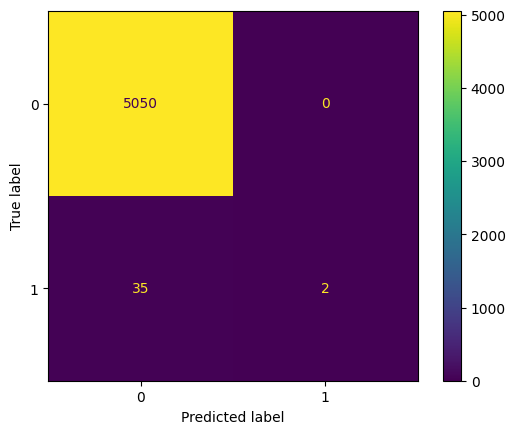

Testing:


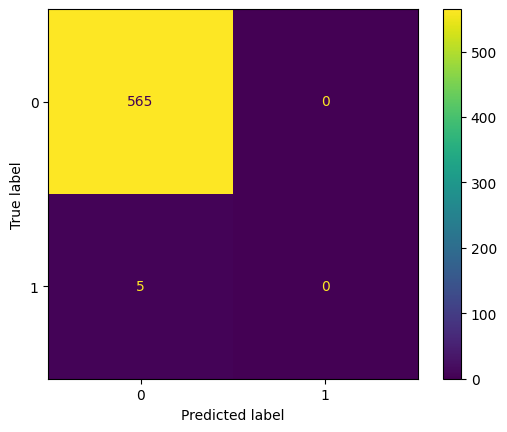

In [ ]:
analyze_results(model, X_train, y_train, X_test, y_test)

# Logistic Regression

Let's try out some other models.


Here, I'll do what I did before, but using a Logistic Regression model instead of a KNN model. I'll set up a model using the imported `LogisticRegression` object with `max_iter`=1000.

In [ ]:
# Creating a model (will train later)

max_iter = 1000

model = LogisticRegression(max_iter=max_iter)

Now I will train and analyze my `model` like I did before, using both accuracy and confusion matrices.

0.9272655789266758
0.6508771929824562
-------------------------------------------
Model Results

Training:


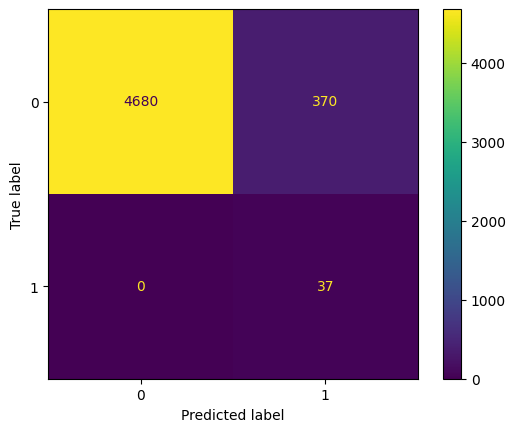

Testing:


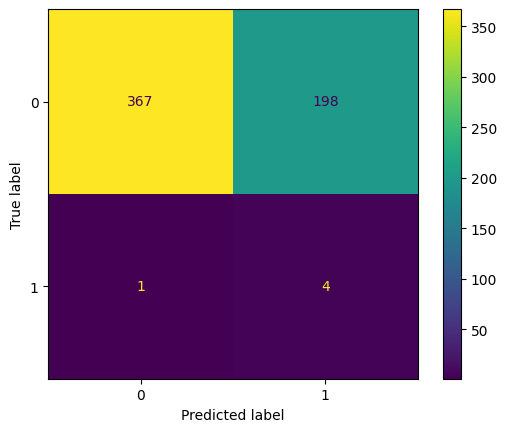

In [ ]:
# Training the model, seeing accuracies, and analyzing the results

model.fit(X_train,y_train)

train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)
print(accuracy_score(y_train, train_predictions))
print(accuracy_score(y_test, test_predictions))

analyze_results(model=model, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

# Decision Tree Model


1.0
0.9824561403508771
-------------------------------------------
Model Results

Training:


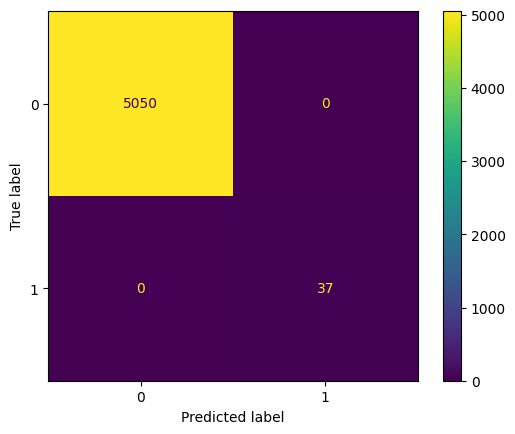

Testing:


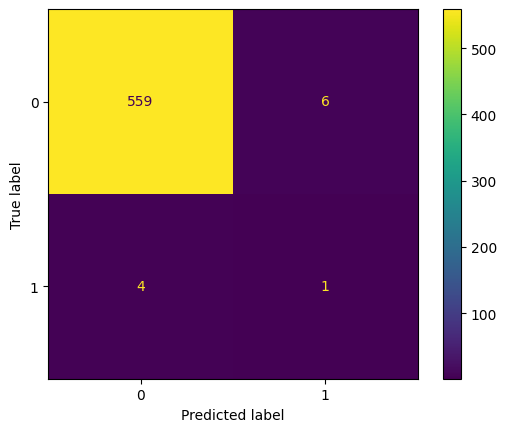

In [ ]:
model = tree.DecisionTreeClassifier()


model.fit(X_train,y_train)

train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)
print(accuracy_score(y_train, train_predictions))
print(accuracy_score(y_test, test_predictions))

analyze_results(model=model, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

# Data Augmentation

In the previous training techniques, I noticed that the models may have had high levels of accuracy, but yielded poor results.

Here, I'll try to improve performance using data augmentation. I'll apply five different augmentation techniques to this dataset. I'll compare these results with the previous results I've had as a baseline.


In [ ]:
#@title I will run to define helper functions
def smote(a,b):
    model = SMOTE()
    X,y = model.fit_resample(a, b)
    return X,y

def savgol(df1,df2):
    x = savgol_filter(df1,21,4,deriv=0)
    y = savgol_filter(df2,21,4,deriv=0)
    return x,y

def fourier(df1,df2):
    X_train = np.abs(np.fft.fft(df1, axis=1))
    X_test = np.abs(np.fft.fft(df2, axis=1))
    return X_train,X_test

def norm(df1,df2):
    X_train = normalize(df1)
    X_test = normalize(df2)
    return X_train,X_test

def robust(df1,df2):
    scaler = RobustScaler()
    X_train = scaler.fit_transform(df1)
    X_test = scaler.transform(df2)
    return X_train,X_test

# Normalization


I'll create a function to `normalize` our `X_train` and `X_test` and complete the function `norm`.

In [ ]:
def norm(X_train, X_test):
    """
    Helper function to normalize inputs X_train and X_test.

    Args:
    X_train: {array-like, sparse matrix} of shape (n_samples, n_features)
    Input values for model training.
    X_test: {array-like, sparse matrix} of shape (n_samples, n_features)
    Input values for model testing.

    Returns:
    X_train: {array-like, sparse matrix} of shape (n_samples, n_features)
    Input values for model training.
    X_test: {array-like, sparse matrix} of shape (n_samples, n_features)
    Input values for model testing.
    """
    minval = np.minimum(np.min(X_train),np.min(X_test))
    maxval = np.maximum(np.max(X_train),np.max(X_test))
    norm_X_train = (X_train-minval)/(maxval-minval)
    norm_X_test = (X_test-minval)/(maxval-minval)
    return norm_X_train, norm_X_test

Now I'll apply this concept to my `X_train` and `X_test` variables using the previously defined helper-function called `norm`. I'll use it alongside a couple of other preprocessing functions.

In [ ]:
fourier_X_train, fourier_X_test = fourier(X_train, X_test)
savgol_X_train, savgol_X_test = savgol(fourier_X_train, fourier_X_test)

#####TODO#########
norm_X_train, norm_X_test = norm(savgol_X_train,savgol_X_test)
##################

robust_X_train, robust_X_test = robust(norm_X_train, norm_X_test)

# Data Augmentation with SMOTE


Now I have to tackle the problem of having an imbalanced dataset. The concept that I'll use to approach this is by synthesizing new data based off of my existing data to create a more balanced dataset. Essentially, I'll be creating new datapoints to have more exoplanet samples.

I'll accomplish this by using SMOTE.

SMOTE generates new data for the minority class to help balance the dataset, and to better help define classifcation regions - so the model doesn't always predict the majority class.

I will now apply this concept by generating new datapoints in robust_X_train and y_train using my predefined helper-function smote.

I can both modify my data to look cleaner and also to have more samples in my dataset.

In [ ]:
#####TODO#########
smote_X_train,smote_y_train = smote(robust_X_train, y_train)
##################

In [ ]:
#@title I'll run to load helper functions and variables
def visualize_data(X, y, indices):
  stars = indices

  fig = plt.figure(figsize=(24,500))
  x = np.array(range(3197))
  for i in range(0, len(stars)):
      ax = fig.add_subplot(100, 5, 1+i)
      ax.set_title('Data ' + "I:" + str(stars[i]) + " Label:" + str(y[stars[i]]))
      ax.scatter(x, X[stars[i],:], s=1)

robust_y_train_with_exoplanet_indices = y_train.to_numpy().nonzero()[0]
robust_y_train_with_no_exoplanet_indices = (y_train - 1).to_numpy().nonzero()[0]

smote_y_train_with_exoplanet_indices = smote_y_train.to_numpy().nonzero()[0]
smote_y_train_with_no_exoplanet_indices = (smote_y_train - 1).to_numpy().nonzero()[0]

Original, newly modified data with exoplanets:


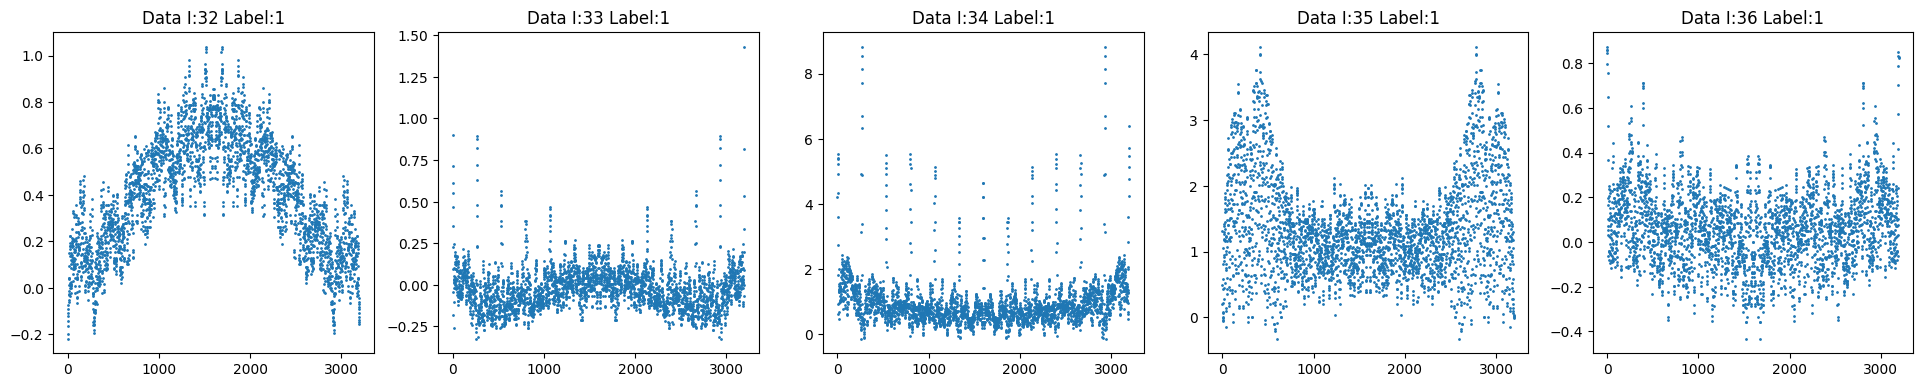

In [ ]:
#@title I will run to visualize original, preprocessed data with exoplanets
print("Original, newly modified data with exoplanets:")
visualize_data(robust_X_train, y_train, robust_y_train_with_exoplanet_indices[-5:])

Augmented data with exoplanets:


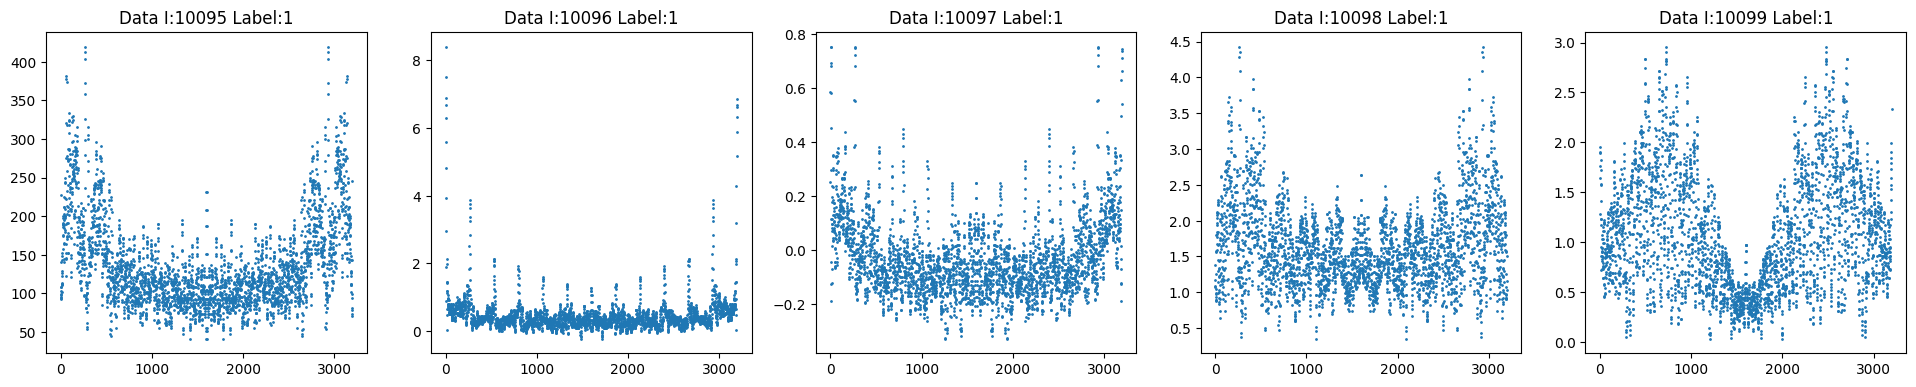

In [ ]:
#@title I'll run to visualize newly generated data containing exoplanets
print("Augmented data with exoplanets:")
visualize_data(smote_X_train, smote_y_train, smote_y_train_with_exoplanet_indices[-5:])

**How do these plots compare to the plots without SMOTE?**

There's a lot more samples, as indicated by the "i" value at the top.

Original, newly modified data with no exoplanets:


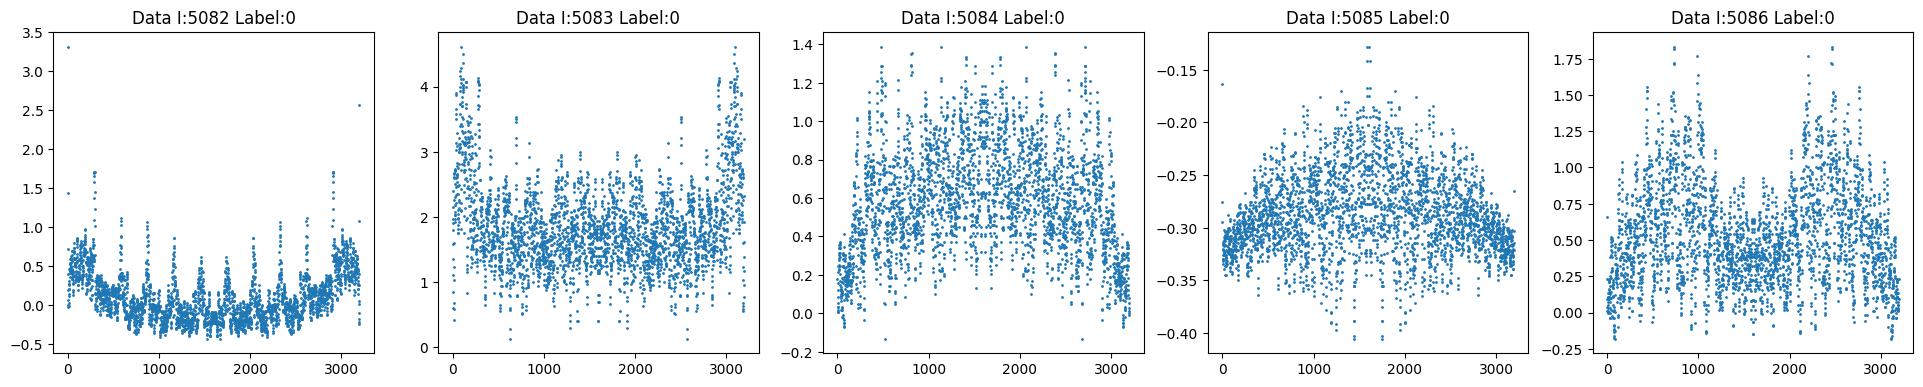

In [ ]:
#@title I'll run to visualize original, modified data with no Exoplanets
print("Original, newly modified data with no exoplanets:")
visualize_data(robust_X_train, y_train, robust_y_train_with_no_exoplanet_indices[-5:])

Augmented data with no Exoplanets:


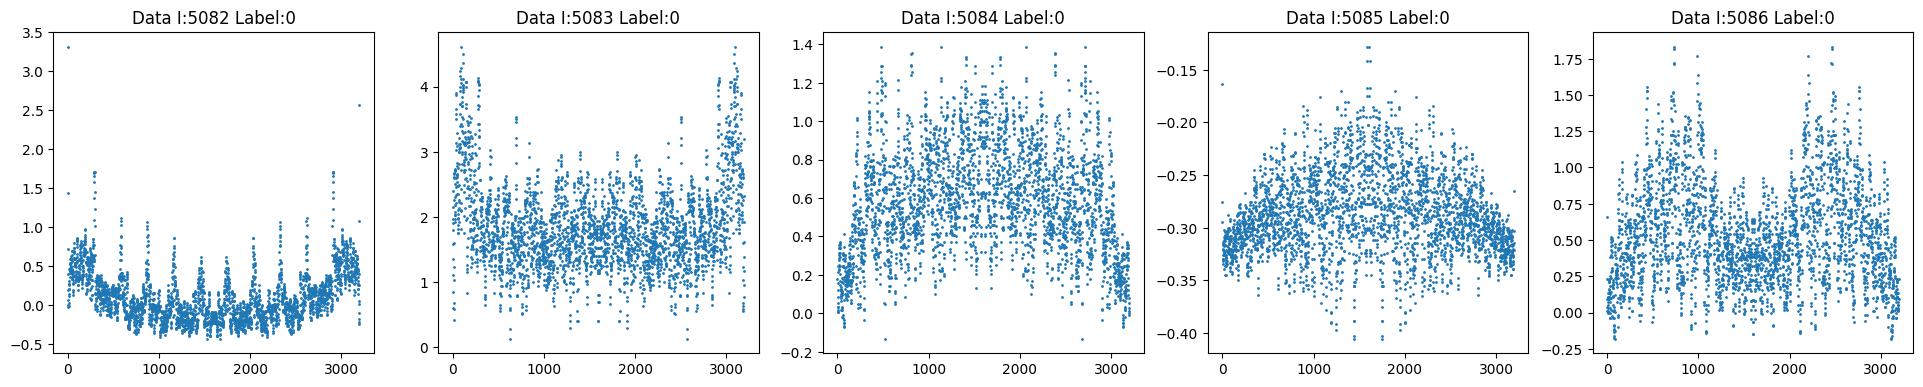

In [ ]:
#@title I'll run to visualize newly generated data containing no exoplanets
print("Augmented data with no Exoplanets:")
visualize_data(smote_X_train, smote_y_train, smote_y_train_with_no_exoplanet_indices[-5:])

**What's the difference between these plots?**

It's the exact same since this is the non-exoplanet data, which SMOTE doesn't effect (as it's the majority class)

In [ ]:
print("y_train len:", len(smote_y_train))

number_of_exoplanet_samples = np.count_nonzero(smote_y_train == 1)
number_of_non_exoplanet_samples = np.count_nonzero(smote_y_train == 0)

print("exoplanet samples in y_train:", number_of_exoplanet_samples)
print("non-exoplanet samples in y_train:", number_of_non_exoplanet_samples)

y_train len: 10100
exoplanet samples in y_train: 5050
non-exoplanet samples in y_train: 5050


# Using Augmented Data

Now I'll find out how the augmentation affects the results with a past architecture using the new data and pick the model that performed best from before and re-train it with the new augmented data.

## Model 1: Tree Decision Classifier

-------------------------------------------
Model Results

Training:


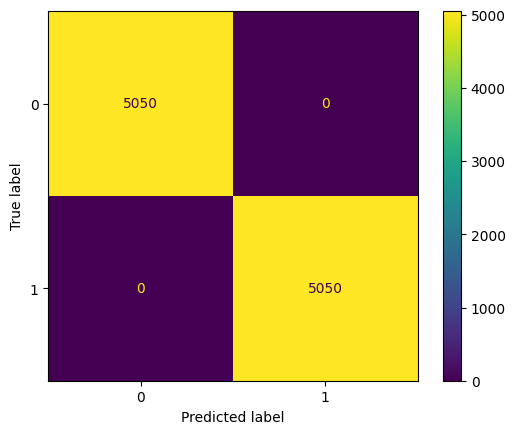

Testing:


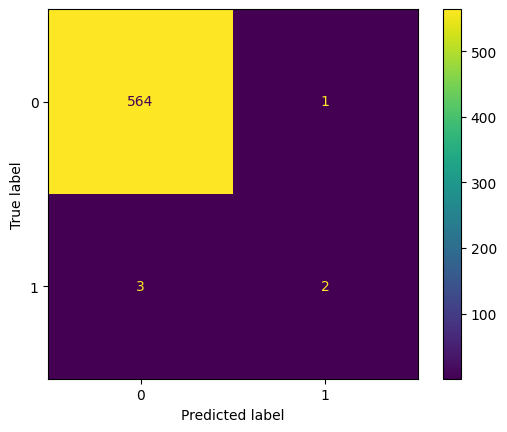

In [ ]:
# Creating a model (will train later)

model = tree.DecisionTreeClassifier()
model.fit(smote_X_train, smote_y_train)
analyze_results(model=model, X_train=smote_X_train, y_train=smote_y_train, X_test=robust_X_test, y_test=y_test)

In [ ]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)
print(accuracy_score(y_train, train_predictions))
print(accuracy_score(y_test, test_predictions))

0.820916060546491
0.8210526315789474


## Model 2: Classification with KNN

-------------------------------------------
Model Results

Training:


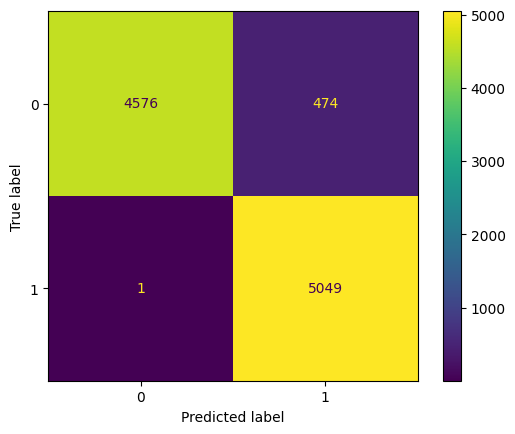

Testing:


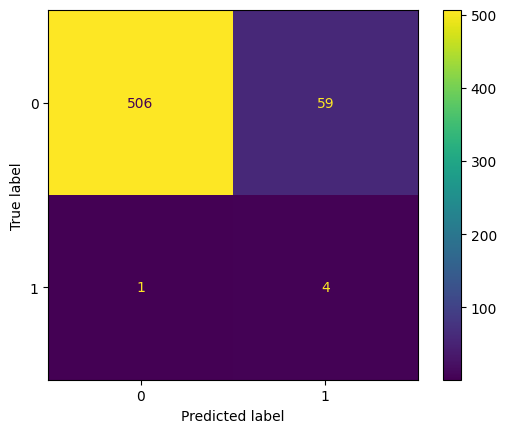

In [ ]:
n_neighbors = 5

model = KNeighborsClassifier(n_neighbors=n_neighbors)
model.fit(smote_X_train, smote_y_train)
analyze_results(model=model, X_train=smote_X_train, y_train=smote_y_train, X_test=robust_X_test, y_test=y_test)

In [ ]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)
print(accuracy_score(y_train, train_predictions))
print(accuracy_score(y_test, test_predictions))

0.942991940239827
0.956140350877193


## Model 3: Logistic Regression

-------------------------------------------
Model Results

Training:


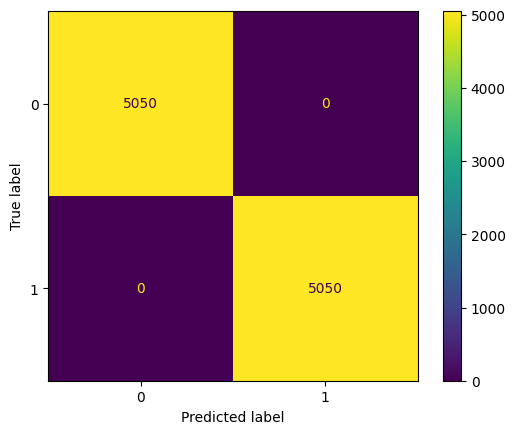

Testing:


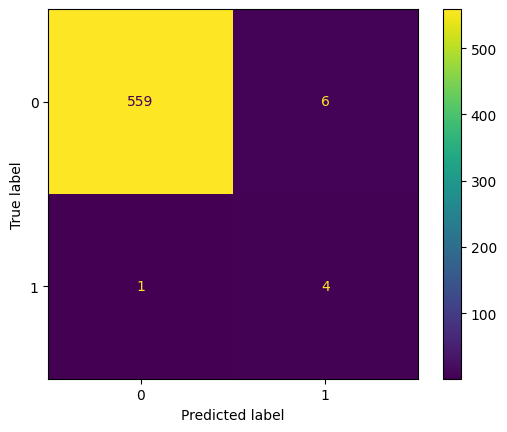

In [30]:
max_iter = 1000

model = LogisticRegression(max_iter=max_iter)

model.fit(smote_X_train, smote_y_train)
analyze_results(model=model, X_train=smote_X_train, y_train=smote_y_train, X_test=robust_X_test, y_test=y_test)

In [31]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)
print(accuracy_score(y_train, train_predictions))
print(accuracy_score(y_test, test_predictions))

0.534303125614311
0.5052631578947369


In [32]:
#@title I'll run this code
!wget -q --show-progress 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20Planet%20Hunters/exoTrain.csv'
!wget -q --show-progress 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20Planet%20Hunters/exoTest.csv'

from urllib.request import urlretrieve
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import torch
import torch.nn as nn
import torch.nn.functional as F

from sklearn.neural_network import MLPClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn import  metrics
from sklearn import tree
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from scipy.signal import savgol_filter
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,precision_score,recall_score,f1_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, normalize

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv1D, Conv2D, MaxPooling2D, BatchNormalization, MaxPooling1D
from keras.losses import categorical_crossentropy
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model

df_train = pd.read_csv('exoTrain.csv')
df_train['LABEL'] = df_train['LABEL'] -1
df_test = pd.read_csv('exoTest.csv')
df_test['LABEL'] = df_test['LABEL'] - 1

def plot_graphs(history, best):

  plt.figure(figsize=[10,4])
  # summarize history for accuracy
  plt.subplot(121)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy across training\n best accuracy of %.02f'%best[1])
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')

  # summarize history for loss
  plt.subplot(122)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss across training\n best loss of %.02f'%best[0])
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

def analyze_results(model, X_train, y_train, X_test, y_test):
    """
    Helper function to help interpret and model performance.

    Args:
    model: estimator instance
    X_train: {array-like, sparse matrix} of shape (n_samples, n_features)
    Input values for model training.
    y_train : array-like of shape (n_samples,)
    Target values for model training.
    X_test: {array-like, sparse matrix} of shape (n_samples, n_features)
    Input values for model testing.
    y_test : array-like of shape (n_samples,)
    Target values for model testing.

    Returns:
    None
    """
    print("-------------------------------------------")
    print("Model Results")
    print("")
    print("Training:")
    if type(model) == keras.src.engine.sequential.Sequential:
      train_predictions = model.predict(X_train)
      train_predictions = (train_predictions > 0.5)
      cm = confusion_matrix(y_train, train_predictions)
      labels = [0, 1]
      df_cm = pd.DataFrame(cm,index = labels,columns = labels)
      fig = plt.figure()
      res = sns.heatmap(df_cm, annot=True,cmap='Blues', fmt='g')
      #plt.yticks([1.25, 3.75], labels,va='center')
      plt.title('Confusion Matrix - TestData')
      plt.ylabel('True label')
      plt.xlabel('Predicted label')
      plt.show()
    else:
      plt.close()
      ConfusionMatrixDisplay.from_estimator(model,X_train,y_train)
      plt.show()

    print("Testing:")
    if type(model) == keras.src.engine.sequential.Sequential:
      test_predictions = model.predict(X_test)
      test_predictions = (test_predictions > 0.5)
      cm = confusion_matrix(y_test, test_predictions)
      labels = [0, 1]
      df_cm = pd.DataFrame(cm,index = labels,columns = labels)
      fig = plt.figure()
      res = sns.heatmap(df_cm, annot=True,cmap='Blues', fmt='g')
      #plt.yticks([1.25, 3.75], labels,va='center')
      plt.title('Confusion Matrix - TestData')
      plt.ylabel('True label')
      plt.xlabel('Predicted label')
      plt.show()
    else:
      ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)

X_train = df_train.drop('LABEL', axis=1)
y_train = df_train['LABEL']
X_test = df_test.drop('LABEL', axis=1)
y_test = df_test['LABEL']

exoTrain.csv.1      100%[===================>] 250.08M  19.9MB/s    in 4.7s    
exoTest.csv.1       100%[===================>]  27.57M   112MB/s    in 0.2s    


In [ ]:
#@title I'll run this code to preprocess data

def smote(a,b):
    model = SMOTE()
    X,y = model.fit_resample(a, b)
    return X,y

def savgol(df1,df2):
    x = savgol_filter(df1,21,4,deriv=0)
    y = savgol_filter(df2,21,4,deriv=0)
    return x,y

def fourier(df1,df2):
    X_train = np.abs(np.fft.fft(df1, axis=1))
    X_test = np.abs(np.fft.fft(df2, axis=1))
    return X_train,X_test

def norm(df1,df2):
    X_train = normalize(df1)
    X_test = normalize(df2)
    return X_train,X_test

def robust(df1,df2):
    scaler = RobustScaler()
    X_train = scaler.fit_transform(df1)
    X_test = scaler.transform(df2)
    return X_train,X_test

fourier_X_train, fourier_X_test = fourier(X_train, X_test)
savgol_X_train, savgol_X_test = savgol(fourier_X_train, fourier_X_test)
norm_X_train, norm_X_test = norm(savgol_X_train,savgol_X_test)
robust_X_train, robust_X_test = robust(norm_X_train, norm_X_test)
smote_X_train,smote_y_train = smote(robust_X_train, y_train)

# Here we're adding the generated, augmented data onto the testing data
# aug_X_train, new_X_test_data, aug_y_train, new_y_test_data = train_test_split(smote_X_train, smote_y_train, test_size=0.3)
# aug_X_test = np.concatenate((robust_X_test, new_X_test_data), axis=0)
# aug_y_test = np.concatenate((y_test, new_y_test_data), axis=0)

## Neural Nets

MLP stands for Multi-layer Perceptron, a specific kind of simple neural network, which can be seen below.


![visual](https://s3.amazonaws.com/stackabuse/media/intro-to-neural-networks-scikit-learn-3.png)

I'll complete this by using an `MLPClassifier` model imported by the `sklearn` package and create a model with:
1. One hidden layer with 10 units
2. random_state = 1
3. 300 max iterations

In [ ]:
# Creating an MLP model (will train later)

model = MLPClassifier(random_state=1, max_iter=300, hidden_layer_sizes=(10))

Now, I'll train my model using `smote_X_train` and `smote_y_train`, and analyze its accuracy and confusion matrix.


0.9995049504950495
0.9929824561403509
-------------------------------------------
Model Results

Training:


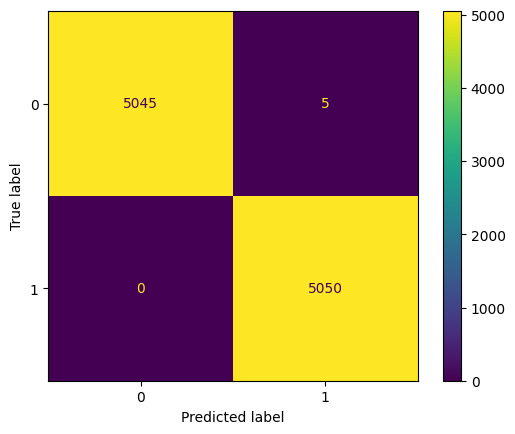

Testing:


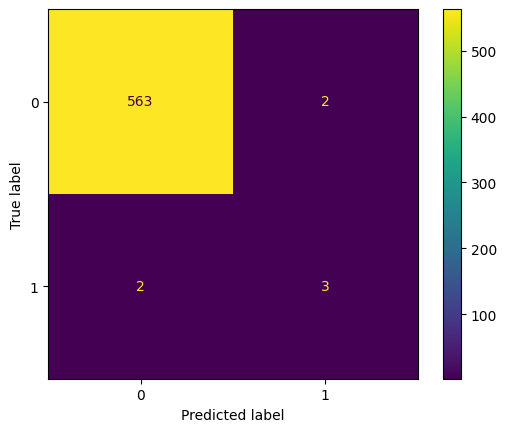

In [35]:
model.fit(smote_X_train, smote_y_train)

train_predictions = model.predict(smote_X_train)
test_predictions = model.predict(robust_X_test)
print(accuracy_score(smote_y_train, train_predictions))
print(accuracy_score(y_test, test_predictions))
analyze_results(model=model, X_train=smote_X_train, y_train=smote_y_train, X_test=robust_X_test, y_test=y_test)

## Neural Networks (Tensorflow and Keras)

Now I'll do what I did before, but using `tensorflow` and `keras`. These libraries will be crucial as they will allow me to create more complex models.

I'll start by creating a similar model.

I'll be using a `Sequential` model in order to act as a "list of layers", which I will define to match my previous example. Later, I'll use it to build more complex, advanced models.

In [ ]:
# Creating an MLP model (will train later)

# First, I initialize my model
model = Sequential()
# then I add a "Dense" (i.e. fully connected) layer
model.add(Dense(10, input_shape=(3197,), activation = "relu")) # for the first layer we specify the input dimensions
# I end by defining the output layer, which has the number of dimensions of the predictions we're making
model.add(Dense(1, activation='sigmoid'))
# I finalize the model by "compiling" it and defining some other hyperparameters
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Now to check the details of the model, I'll run the code block below.

In [ ]:
model.summary()

Now I'll train and analyze the `model` like I did before. I'll need to specify these parameters to `fit`:

1. `batch_size` = 64
2. `epochs` = 20
3. `verbose` = 1
4. `validation_data` = (`robust_X_test`, `y_test`)
5. `shuffle` = True


In [38]:
# Training and analyzing the model
batch_size = 64
epochs = 20
validation_data = (robust_X_test, y_test)
verbose = 1
shuffle = True

history = model.fit(smote_X_train, smote_y_train, batch_size=batch_size, epochs=epochs, verbose=verbose,
                            validation_data=validation_data, shuffle=shuffle)

Epoch 1/20
158/158 [==============================] - 1s 4ms/step - loss: 0.2226 - accuracy: 0.9228 - val_loss: 0.1274 - val_accuracy: 0.9719
Epoch 2/20
158/158 [==============================] - 0s 3ms/step - loss: 0.0678 - accuracy: 0.9793 - val_loss: 0.1213 - val_accuracy: 0.9789
Epoch 3/20
158/158 [==============================] - 0s 3ms/step - loss: 0.0445 - accuracy: 0.9838 - val_loss: 0.1474 - val_accuracy: 0.9772
Epoch 4/20
158/158 [==============================] - 0s 3ms/step - loss: 0.0388 - accuracy: 0.9877 - val_loss: 0.1413 - val_accuracy: 0.9789
Epoch 5/20
158/158 [==============================] - 0s 2ms/step - loss: 0.0307 - accuracy: 0.9904 - val_loss: 0.1502 - val_accuracy: 0.9772
Epoch 6/20
158/158 [==============================] - 0s 3ms/step - loss: 0.0290 - accuracy: 0.9886 - val_loss: 0.1555 - val_accuracy: 0.9825
Epoch 7/20
158/158 [==============================] - 0s 3ms/step - loss: 0.0288 - accuracy: 0.9916 - val_loss: 0.1570 - val_accuracy: 0.9789
Epoch 

Now I will see how to view the performance of the model as it trained over time!

In addition, I still want to be able to plot the confusion matrix of the model to check for performance and potential class biases. I'll enter code to analyze the model in the codeblock below.

In [ ]:
performance = model.evaluate(robust_X_test, y_test, batch_size=batch_size)
plot_graphs(history, performance)

##############
analyze_results(model=model, X_train=smote_X_train, y_train=smote_y_train, X_test=robust_X_test, y_test=y_test)
##############

## Convolutional Neural Network (CNN)

One potential fault of my previous approach is memorizing the placement of specific patterns in the data. Although I was able to achieve great levels of accuracy, I could benefit from an architecture that can make decisions based on patterns no matter where they occur in the sample - for example, if I started measuring flux earlier or later. This is something that CNNs excel at.

First, I'll have to "reshape" my augmented data into a shape that can be fed into a 1-dimensional CNN. I've reshaped the training data below and I'll **reshape the testing data, too.**

Note: No new information is created, but just the way the information is structured. Because of this, I should have the same number of values present overall with no modifications to the values themselves.

In [40]:
cnn_smote_X_train = np.expand_dims(smote_X_train, axis=2)
cnn_smote_y_train = smote_y_train

############
cnn_preprocess_X_test = np.expand_dims(robust_X_test, axis=2)
cnn_preprocess_y_test = y_test
############

cnn_X_train = np.expand_dims(X_train, axis=2)
cnn_y_train = y_train

############
cnn_X_test = np.expand_dims(X_test, axis=2)
cnn_y_test = y_test
############

The new data is stored in variables: `cnn_smote_X_train`, `cnn_preprocess_X_test`, `cnn_smote_y_train`, `cnn_preprocess_y_test`.

In [ ]:
###
print(cnn_smote_X_train.shape)
print(cnn_preprocess_X_test.shape)
print(cnn_smote_y_train.shape)
print(cnn_preprocess_y_test.shape)


Now, I'll be using a `Sequential` model to build up my CNN.

1. Add a `Conv1D` layer with 8 output filters, kernal size of 5, relu activation function, and padding = 'same'. This layer also requires an `input_shape` parameter.

2. Add a `MaxPooling1D` layer with pool_size = 4, strides = 4, and padding = 'same'.

3. Add a `Conv1D` layer with 16 output filters, kernal size of 3, relu activation function, and padding = 'same'.

4. Add a `MaxPooling1D` layer with pool_size = 4, strides = 4, and padding = 'same'.

5. Add a `Flatten` layer.

6. Add a `Dense` layer with 1 hidden unit and a sigmoid activation function. (This will be the output layer)

In [42]:
# Create model

# First, initialize the model
model = Sequential()
input_shape = [3197, 1]

cnn_layer_1 = Conv1D(8, 5, activation='relu', input_shape=input_shape, padding='same')
cnn_layer_2 = MaxPooling1D(pool_size=4, strides=4, padding='same')
cnn_layer_3 = Conv1D(16, 3, activation='relu', padding='same')
cnn_layer_4 = MaxPooling1D(pool_size=4, strides=4, padding='same')
cnn_layer_5 = Flatten()
cnn_layer_6 = Dense(1, activation='sigmoid')

# then add a "Dense" (i.e. fully connected) layer
model.add(cnn_layer_1) # for the first layer, specify the input dimensions
model.add(cnn_layer_2)
model.add(cnn_layer_3)
model.add(cnn_layer_4)
model.add(cnn_layer_5)
model.add(cnn_layer_6)
# end by defining the output layer, which has the number of dimensions of the predictions I'll make
# model.add(Dense(1, activation='sigmoid'))
# finalize the model by "compiling" it and defining some other hyperparameters
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Now I'll train the model like I did before. This will include `cnn_smote_X_train`, `cnn_preprocess_X_test`, `cnn_smote_y_train`, and `cnn_preprocess_y_test`)

In [ ]:
# Training and analyzing the model

# Training the model, seeing accuracies, and analyzing the results

#######TODO#########

#training the model
batch_size = 64
epochs = 20
validation_data = (cnn_preprocess_X_test, cnn_preprocess_y_test)
verbose = 1
shuffle = True

history = model.fit(cnn_smote_X_train, cnn_smote_y_train, batch_size=batch_size, epochs=epochs, verbose=verbose,
                            validation_data=validation_data, shuffle=shuffle)

####################

Epoch 1/20
158/158 [==============================] - ETA: 0s - loss: 0.2410 - accuracy: 0.9100

Once again, I'll analyze the model's performance over time and the final confusion matrices:

In [ ]:
performance = model.evaluate(cnn_preprocess_X_test, cnn_preprocess_y_test, batch_size=batch_size)
plot_graphs(history, performance)

##############
analyze_results(model=model, X_train=cnn_smote_X_train, y_train=cnn_smote_y_train, X_test=cnn_preprocess_X_test, y_test=cnn_preprocess_y_test)
##############

It is evident that the models I trained in the end are yielding higher accuracy. These models are able to correctly predict more exoplanets than previously, while reducing the number of false positives!

# **Thank you!**